## Logistic Regression & SVM

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# prepare data and gt, also the training set and testing set
from sklearn.preprocessing import StandardScaler

raw_data = np.loadtxt(open("parkinsons.data","r"), delimiter=",", skiprows=1, usecols=range(1, 24))
#print(data)

gt = raw_data[:, -7]
#print(gt)

data=np.delete(raw_data, -7, axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, gt, test_size=0.3)
print(X_train.shape)


# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



(136, 22)


In [26]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('-----Logistic Regression-----\ntrain_score: %.3f\ntest_score: %.3f'%(train_score, test_score))

-----Logistic Regression-----
train_score: 0.868
test_score: 0.847


In [27]:
# SVM
from sklearn import svm
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('-----Linear SVM-----\ntrain_score: %.3f\ntest_score: %.3f'%(train_score, test_score))

-----Linear SVM-----
train_score: 0.890
test_score: 0.864


注意：
1.在用sklearn里面的logistic regression时，参数penalty：正则化项的选择。正则化主要有两种：L1和L2，LogisticRegression默认选择L2正则化。‘liblinear’ 支持L1和L2，但‘newton-cg’, ‘sag’ 和‘lbfgs’ 只支持L2正则化。由于要求使用L1正则化，且使用的是小型数据集，用‘liblinear’ ，就可以。
2.线性SVM依赖数据表达的距离测度，所以需要对数据先做normalization。
总结：
从测试集来看，logistic regression的精度（0.847）要略小于Linear SVM（0.864）；
理论上，两者的区别在于，Logistic Regression处理所有数据，使用了sigmoid变换；SVM只考虑边界线附近的点，即支持向量。

## Contribution of each dimansion

-----Linear SVM(dimansion 0)-----
test_score: 0.746
-----Linear SVM(dimansion 1)-----
test_score: 0.814
-----Linear SVM(dimansion 2)-----
test_score: 0.729
-----Linear SVM(dimansion 3)-----
test_score: 0.814
-----Linear SVM(dimansion 4)-----
test_score: 0.831
-----Linear SVM(dimansion 5)-----
test_score: 0.814
-----Linear SVM(dimansion 6)-----
test_score: 0.814
-----Linear SVM(dimansion 7)-----
test_score: 0.814
-----Linear SVM(dimansion 8)-----
test_score: 0.814
-----Linear SVM(dimansion 9)-----
test_score: 0.814
-----Linear SVM(dimansion 10)-----
test_score: 0.814
-----Linear SVM(dimansion 11)-----
test_score: 0.814
-----Linear SVM(dimansion 12)-----
test_score: 0.678
-----Linear SVM(dimansion 13)-----
test_score: 0.814
-----Linear SVM(dimansion 14)-----
test_score: 0.814
-----Linear SVM(dimansion 15)-----
test_score: 0.814
-----Linear SVM(dimansion 16)-----
test_score: 0.814
-----Linear SVM(dimansion 17)-----
test_score: 0.814
-----Linear SVM(dimansion 18)-----
test_score: 0.864
---

Text(0.5, 1.0, 'Test score for using each dimansion')

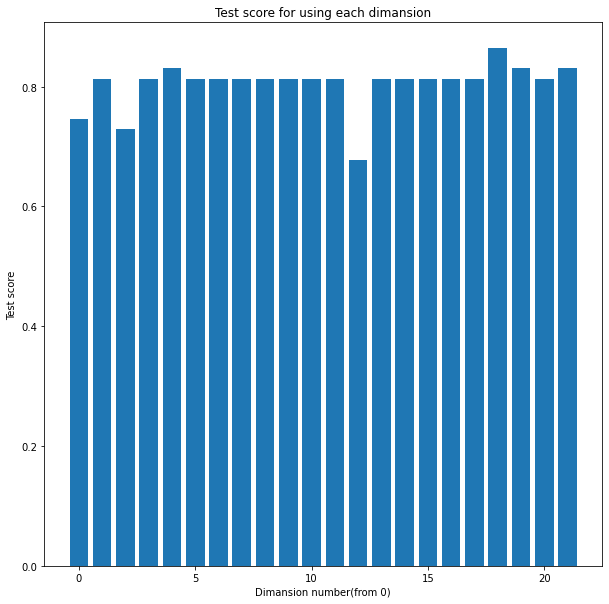

In [55]:
# only take one dimansion for training and testing for each time
test_score_eachdim=[]
dim = []
for i in range(0, data.shape[1]):
    X_train_local = X_train[:, i]
    tempsize = X_train_local.shape[0]
    X_train_local = X_train_local.reshape((tempsize, 1))
    
    X_test_local = X_test[:, i]
    tempsize = X_test_local.shape[0]
    X_test_local = X_test_local.reshape((tempsize, 1))
    
    
    clf = svm.SVC(C=1.0, kernel='linear')
    clf.fit(X_train_local, y_train)
    test_score = clf.score(X_test_local, y_test)
    test_score_eachdim = np.append(test_score_eachdim, test_score)
    dim = np.append(dim, i)
    print('-----Linear SVM(dimansion %d)-----\ntest_score: %.3f'%(i, test_score))

plt.figure(figsize=(10, 10))
plt.bar(dim, test_score_eachdim)
plt.xlabel('Dimansion number(from 0)')
plt.ylabel('Test score')
plt.title('Test score for using each dimansion')


总结：
每个输入有22维，每次只取其中的一维数据进行测试与训练，可以发现只使用第17维数据（Dimansion number=16）时，得到的test score最高，为0.864，这正好与使用所有维度的数据得到的test score相同，这样比较发现比较发现第17个维度对分类的贡献最大；
也可以使用每次删除一维数据进行测试与训练的方法，但是考虑到数据集的输入维度太高了，就没有这么做；
可能是因为数据集比较小，取各个维度训练后的测试结果没有太明显的差异。
启示是可以删去数据的某些特征不明显的维度，以换取更小的计算量；这与后面讲的降维思想有相似之处。

## Gaussian Kernel

In [83]:
# gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

L = 50
gammas = np.linspace(0.0001, 0.5, L)
Cs = np.linspace(0.0001, 10, L)
param_grid = {'gamma': gammas, 'C':Cs}

clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)
clf.fit(X_train,y_train)
print("best param: {0}".format(clf.best_params_))
print("best score: %.3f"%(clf.best_score_))

best param: {'C': 7.346965306122448, 'gamma': 0.19393877551020408}
best score: 0.956


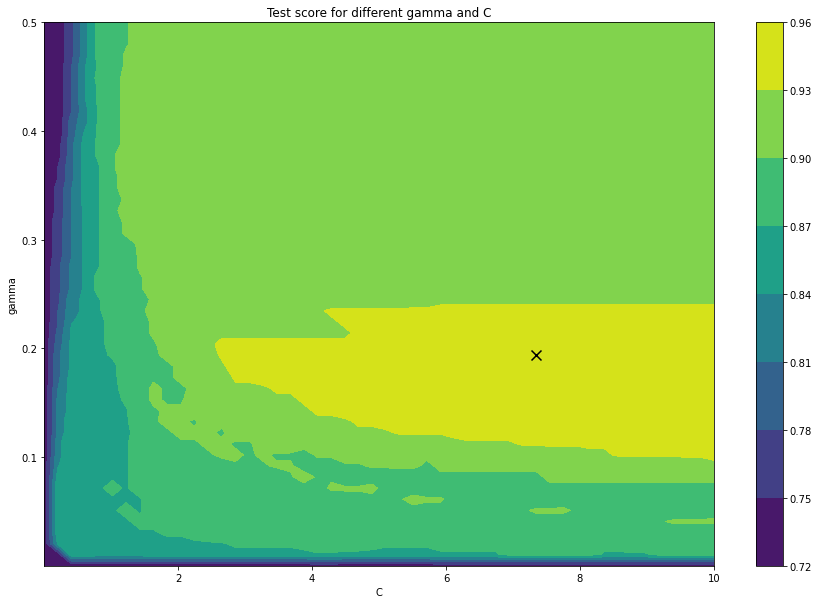

In [97]:
# plot
score = clf.cv_results_['mean_test_score']
score = np.reshape(score, [L, L]).T


plt.figure(figsize=(15, 10))
plt.contourf(Cs, gammas, score)
plt.colorbar()
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Test score for different gamma and C')

# point out the best parameter
plt.scatter(clf.best_params_['C'], clf.best_params_['gamma'], s=100, marker='x', c='black')

总结：
高斯核函数可以映射到无穷维，从结果可以看出，当高斯核函数的参数选择比较好时，test score达到了0.956，比不使用核函数时的test score（0.864）高出了十多个百分点，体现出了高斯核函数的强大；
但是，在寻找最优的gamma和C时，grid search方法需要一些手动尝试搜索范围，以及有一笔计算时间开销，这还是在parkinsons这个数据集很小的情况之下，可以预想到对大的数据集处理的时候，这种遍历搜索计算比较的方法可能会不再适用；可能需要有对参数的学习的算法；此外，已有的经验可能也比较重要。